<a href="https://colab.research.google.com/github/laraccano84/Mentoria_mumuki/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn 
import datetime as dt
import requests
import json
import math
import glob
import cufflinks as cf
import scipy.stats

In [5]:

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [6]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

from matplotlib import cm
from sklearn.decomposition import PCA

In [7]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import metrics

In [3]:
url= 'https://raw.githubusercontent.com/laraccano84/Mentoria_mumuki/main/Entregable_5/df_nuevo_prediccion.csv'
df_pred_mumuki_clus= pd.read_csv(url)

In [4]:
df_pred_mumuki_clus

,student_uid,Cantidad_Envios_error_AssertionError,Cantidad_Envios_error_AttributeError,Cantidad_Envios_error_EOFError,Cantidad_Envios_error_IndentationError,Cantidad_Envios_error_NameError,Cantidad_Envios_error_SyntaxError,Cantidad_Envios_error_TypeError,Ejercicios_unicos_error_AssertionError,Ejercicios_unicos_error_AttributeError,Ejercicios_unicos_error_EOFError,Ejercicios_unicos_error_IndentationError,Ejercicios_unicos_error_NameError,Ejercicios_unicos_error_SyntaxError,Ejercicios_unicos_error_TypeError,Cantidad_Envios,Ejercicios_unicos_caller,Cant_envios_paso,Cant_envios_no_paso,Cant_ejerc_pasoTotal_envios,Cant_ejerc_no_pasoTotal_envios,dif_ejerciciosUnicos_Paso,cant_envios,cant_ejercicios_unicos,tiempo_invertido_horas,tiempo_invertido_dias,Avance_caller,avg_tiempo,Ejercicios_unicos_other,Avance_original
0,76,0,0,0,1,0,5,0,0,0,0,1,0,5,0,89,36,47,42,33,14,3,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
1,77,0,0,0,3,3,23,0,0,0,0,3,1,9,0,186,40,95,91,40,19,0,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
2,78,0,0,0,40,4,9,0,0,0,0,4,2,3,0,84,9,15,69,7,6,2,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
3,79,0,0,0,0,0,9,0,0,0,0,0,0,4,0,95,22,34,61,20,13,2,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
4,80,0,0,0,0,1,36,0,0,0,0,0,1,7,0,125,19,29,96,16,10,3,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,352,0,0,0,0,1,20,0,0,0,0,0,1,4,0,81,9,17,64,7,7,2,181.0,40.0,196.64,8.1933,0,1.086409,40.0,0.0
253,353,0,0,0,0,0,12,0,0,0,0,0,0,5,0,67,40,54,13,40,6,0,306.0,40.0,242.32,10.0967,0,0.791895,40.0,0.0
254,355,0,0,0,0,0,3,0,0,0,0,0,0,2,0,15,8,2,13,2,6,6,209.0,40.0,331.88,13.8283,0,1.587943,40.0,0.0
255,359,0,0,0,0,0,14,0,0,0,0,0,0,4,0,38,16,19,19,15,5,1,147.0,40.0,641.29,26.7204,0,4.362517,40.0,0.0


In [8]:
df_pred_mumuki_clus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   student_uid                               257 non-null    int64  
 1   Cantidad_Envios_error_AssertionError      257 non-null    int64  
 2   Cantidad_Envios_error_AttributeError      257 non-null    int64  
 3   Cantidad_Envios_error_EOFError            257 non-null    int64  
 4   Cantidad_Envios_error_IndentationError    257 non-null    int64  
 5   Cantidad_Envios_error_NameError           257 non-null    int64  
 6   Cantidad_Envios_error_SyntaxError         257 non-null    int64  
 7   Cantidad_Envios_error_TypeError           257 non-null    int64  
 8   Ejercicios_unicos_error_AssertionError    257 non-null    int64  
 9   Ejercicios_unicos_error_AttributeError    257 non-null    int64  
 10  Ejercicios_unicos_error_EOFError      

In [26]:
df_pred_clus=df_pred_mumuki_clus.drop(["Cantidad_Envios_error_AssertionError","Cantidad_Envios_error_AttributeError","Cantidad_Envios_error_EOFError","Cantidad_Envios_error_IndentationError","Cantidad_Envios_error_NameError","Cantidad_Envios_error_SyntaxError","Cantidad_Envios_error_TypeError","Ejercicios_unicos_error_AssertionError",   
 "Ejercicios_unicos_error_EOFError","Ejercicios_unicos_error_IndentationError","Ejercicios_unicos_error_NameError","Ejercicios_unicos_error_SyntaxError","Ejercicios_unicos_error_TypeError"], axis=1)
df_pred_clus

,student_uid,Ejercicios_unicos_error_AttributeError,Cantidad_Envios,Ejercicios_unicos_caller,Cant_envios_paso,Cant_envios_no_paso,Cant_ejerc_pasoTotal_envios,Cant_ejerc_no_pasoTotal_envios,dif_ejerciciosUnicos_Paso,cant_envios,cant_ejercicios_unicos,tiempo_invertido_horas,tiempo_invertido_dias,Avance_caller,avg_tiempo,Ejercicios_unicos_other,Avance_original
0,76,0,89,36,47,42,33,14,3,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
1,77,0,186,40,95,91,40,19,0,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
2,78,0,84,9,15,69,7,6,2,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
3,79,0,95,22,34,61,20,13,2,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
4,80,0,125,19,29,96,16,10,3,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
5,81,0,56,9,14,42,8,7,1,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
6,82,0,256,37,45,211,32,24,5,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
7,83,0,98,16,31,67,14,10,2,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
8,84,0,88,13,25,63,13,9,0,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0
9,85,0,162,15,29,133,12,12,3,0.0,0.0,0.00,0.0000,0,0.000000,0.0,0.0


In [29]:
skills_ratings = ['Cantidad_Envios', 'Ejercicios_unicos_caller', 'Cant_envios_paso', 'Cant_envios_no_paso',
                  'Cant_ejerc_pasoTotal_envios', 'Cant_ejerc_no_pasoTotal_envios', 'dif_ejerciciosUnicos_Paso', 'cant_envios', 'cant_ejercicios_unicos',
                  'tiempo_invertido_horas', 'tiempo_invertido_dias', 'avg_tiempo', 'Avance_original']

print(len(skills_ratings), 'variables numéricas de desempeño del estudiante')

13 variables numéricas de desempeño del estudiante


In [39]:
df_skills=df_pred_clus[skills_ratings]

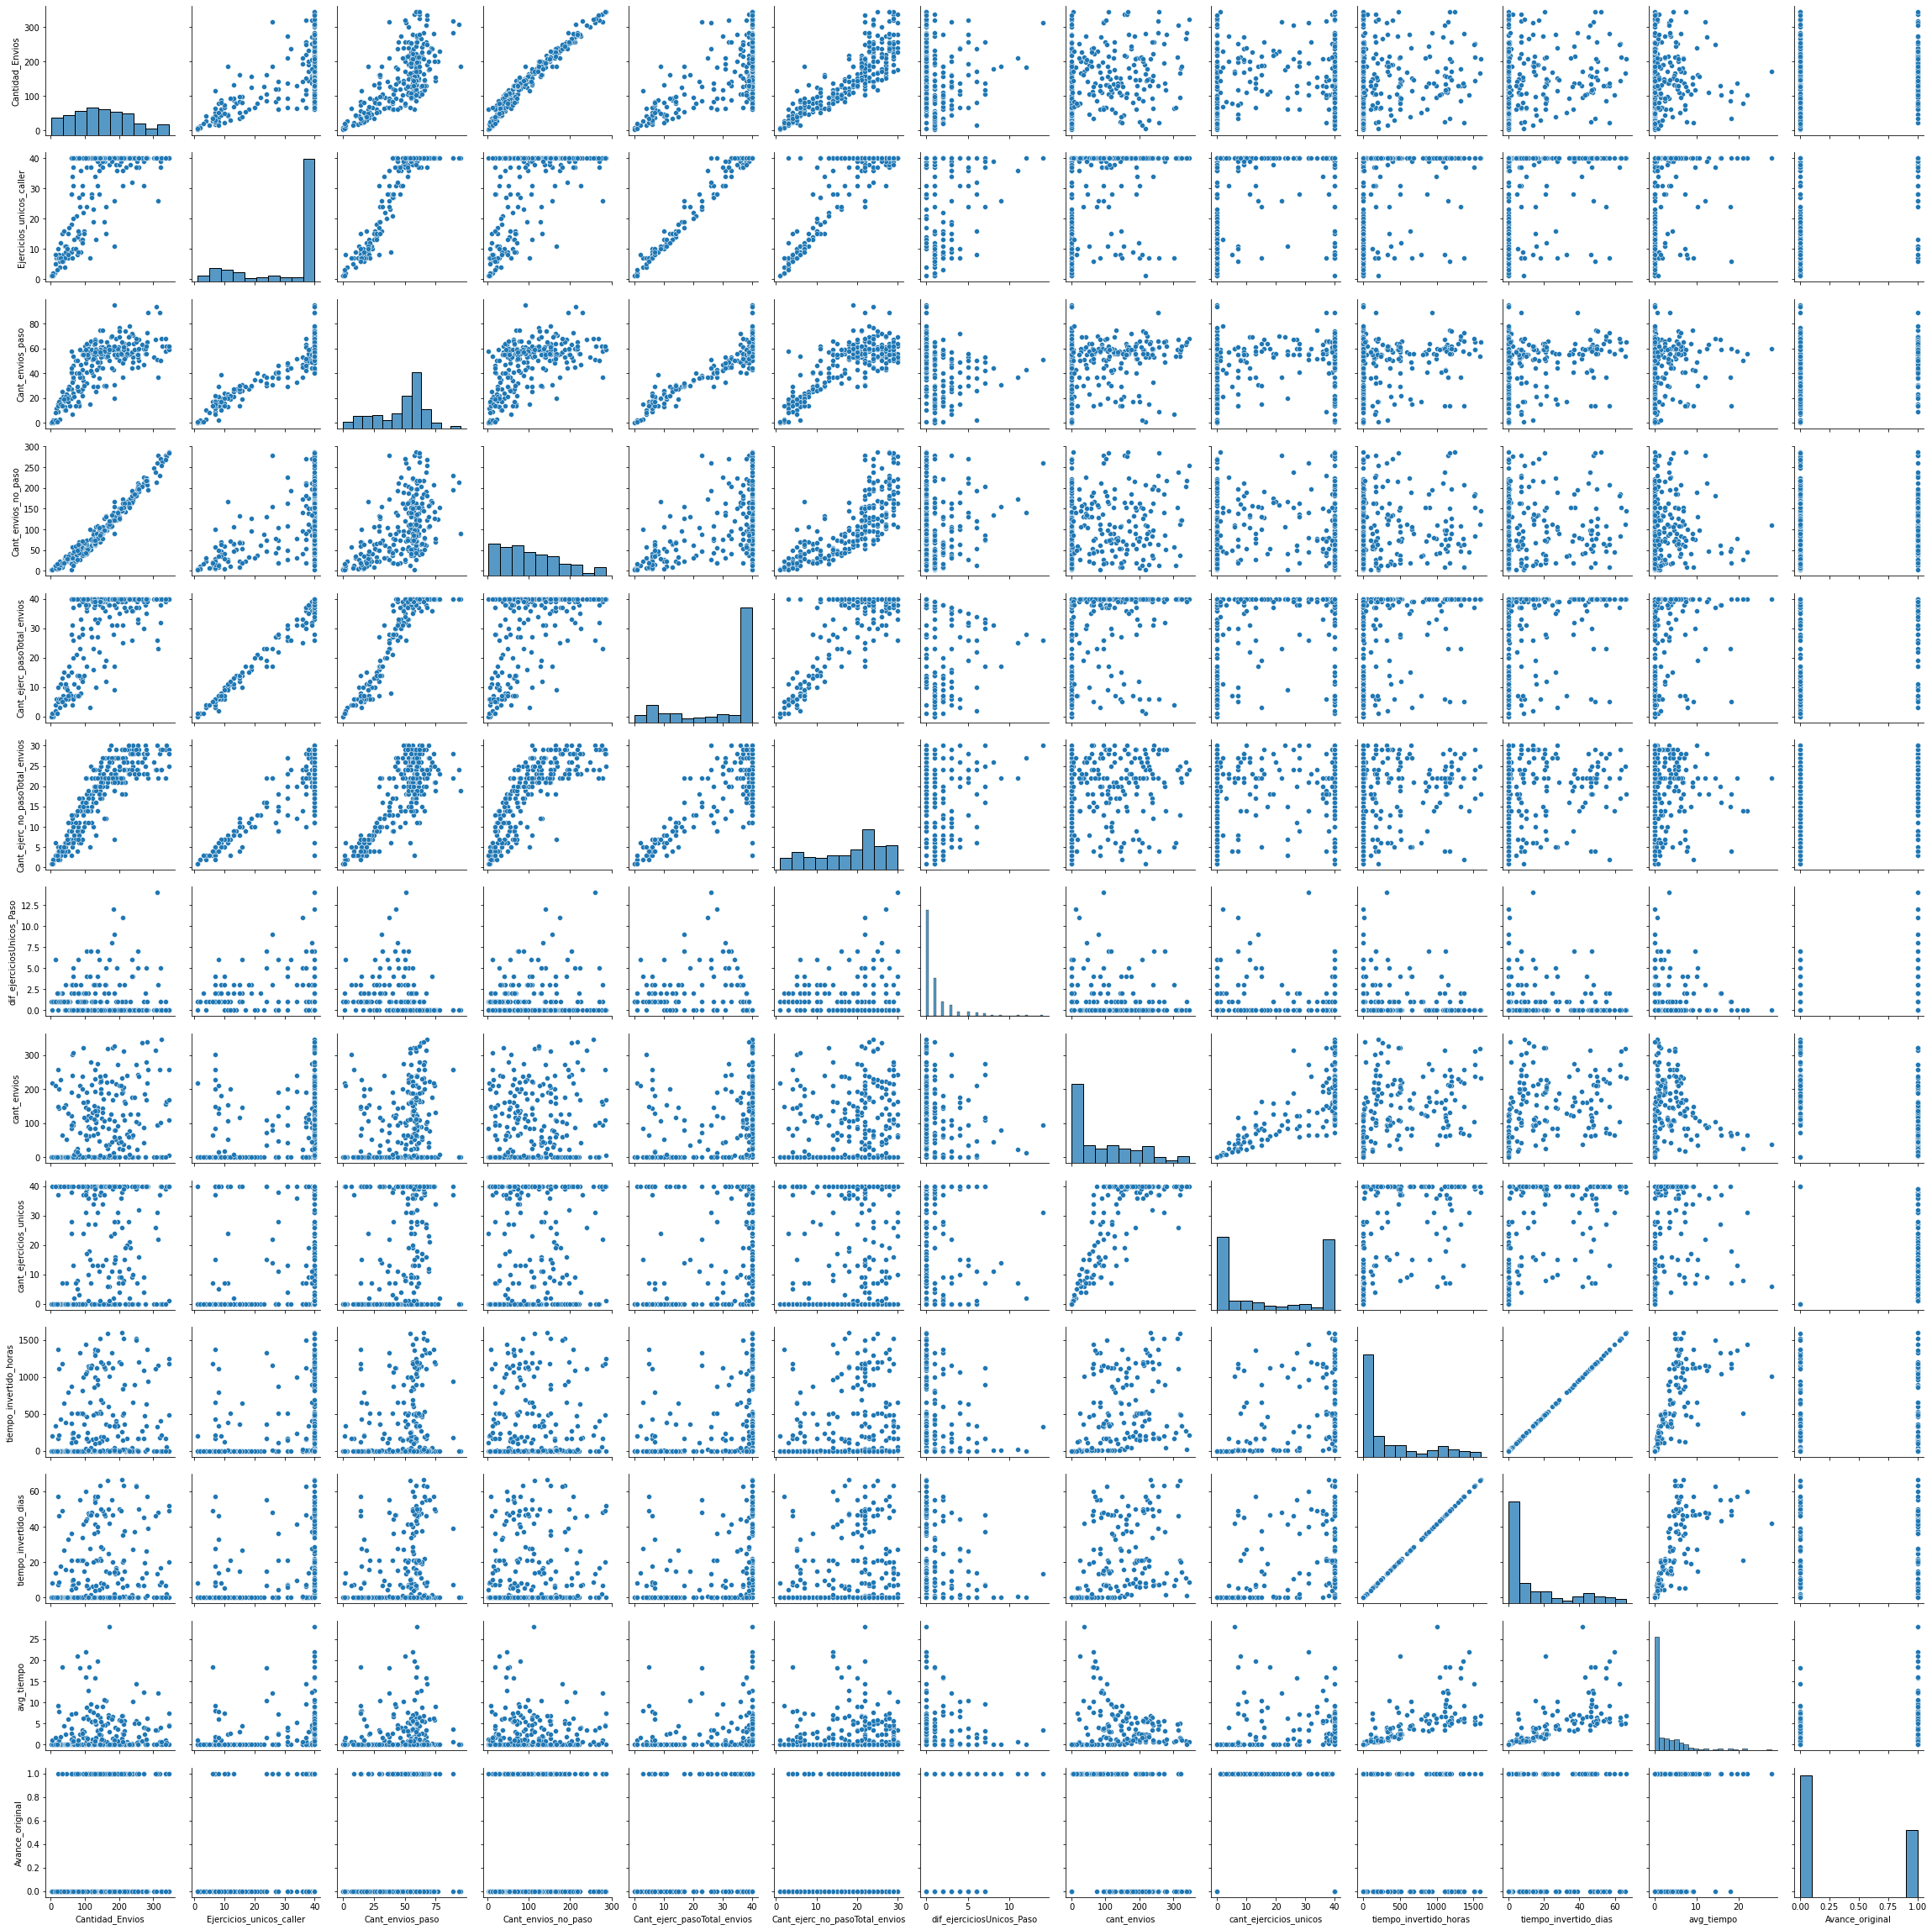

In [40]:

sns.pairplot(df_skills[skills_ratings])

In [105]:
# Número de clusters buscado
n_clust = 3
km = KMeans(n_clusters=n_clust,random_state=42)
km.fit(df_pred_clus) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=inertia=  9793703.257088406


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

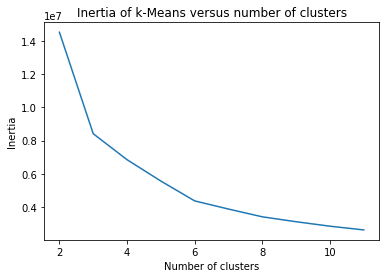

In [106]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 cl1sters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [111]:
skill_1=skills_ratings[7]
skill_2=skills_ratings[10]

In [112]:
student_crack=df_pred_clus["cant_ejercicios_unicos"] > 11
student_no_crack=df_pred_clus["cant_ejercicios_unicos"]<20


In [113]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[student_crack,skill_1], y=df_skills.loc[student_crack,skill_2],
                      text=df_pred_clus.loc[student_crack,'student_uid'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [114]:
fig.show(renderer="colab")

In [115]:
df_clusters=df_pred_clus.copy()
labels = km.labels_
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


In [116]:
df_clusters.kmeans.value_counts()

0    149
2     57
1     51
Name: kmeans, dtype: int64

In [ ]:
df_clusters.kmeans.hist(figsize=(6, 3))
plt.tight_layout()

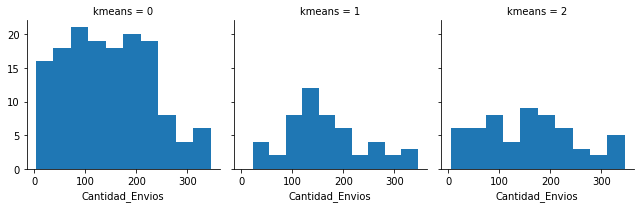

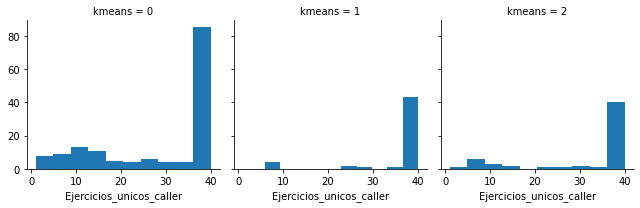

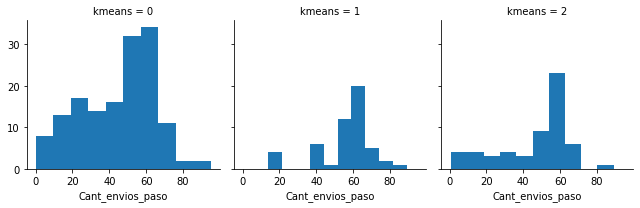

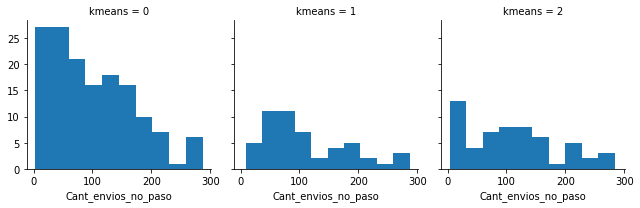

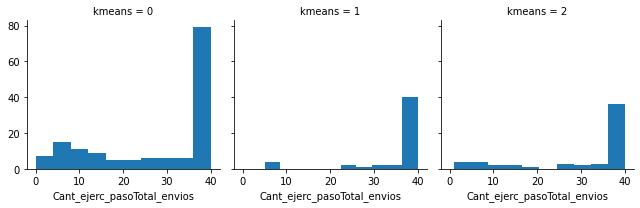

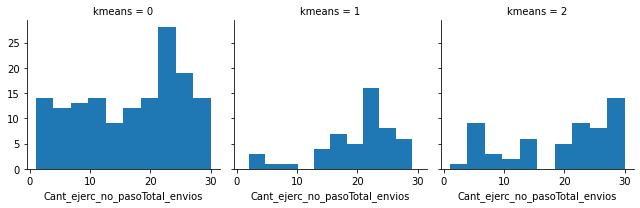

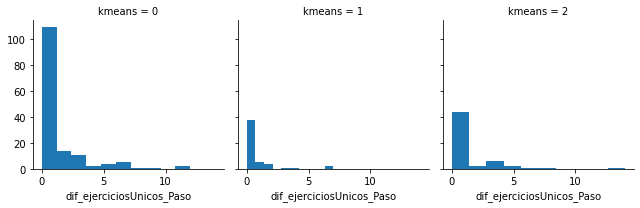

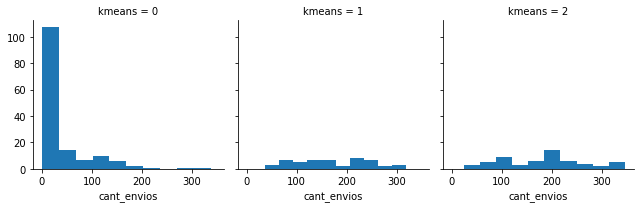

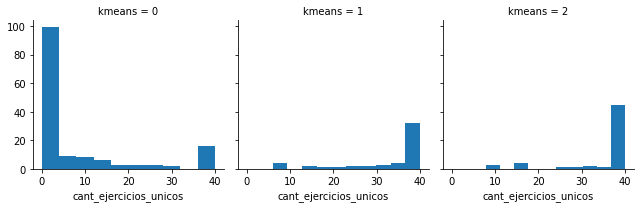

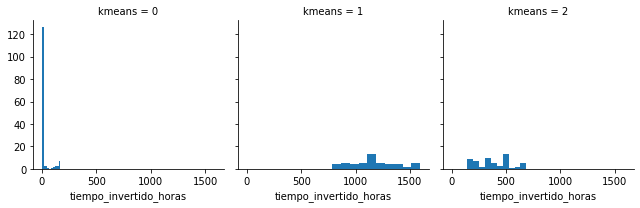

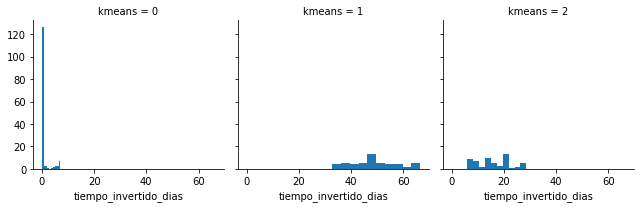

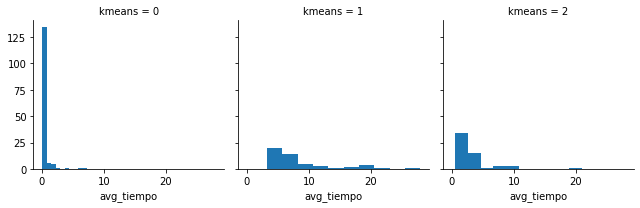

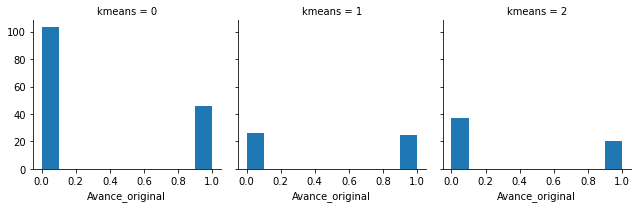

In [117]:
for c in df_clusters[skills_ratings]:
  grid = sns.FacetGrid(df_clusters, col='kmeans')
  grid.map(plt.hist, c)

In [118]:
df_clusters_0=df_clusters[df_clusters["kmeans"]==0]
df_clusters_0.describe()

,student_uid,Ejercicios_unicos_error_AttributeError,Cantidad_Envios,Ejercicios_unicos_caller,Cant_envios_paso,Cant_envios_no_paso,Cant_ejerc_pasoTotal_envios,Cant_ejerc_no_pasoTotal_envios,dif_ejerciciosUnicos_Paso,cant_envios,cant_ejercicios_unicos,tiempo_invertido_horas,tiempo_invertido_dias,Avance_caller,avg_tiempo,Ejercicios_unicos_other,Avance_original,kmeans
count,149.000000,149.0,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.000000,149.000000,149.000000,149.0
mean,180.402685,0.0,145.006711,29.194631,44.308725,100.697987,27.872483,16.798658,1.322148,32.422819,7.422819,17.922819,0.746787,0.0,0.260892,7.422819,0.308725,0.0
std,81.594989,0.0,85.056460,13.700798,20.511335,71.166032,14.082905,8.725529,2.122175,59.295433,12.938096,45.952375,1.914685,0.0,0.912753,12.938096,0.463525,0.0
min,76.000000,0.0,3.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,114.000000,0.0,78.000000,15.000000,27.000000,43.000000,14.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,154.000000,0.0,141.000000,38.000000,50.000000,88.000000,37.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,230.000000,0.0,205.000000,40.000000,59.000000,153.000000,40.000000,24.000000,2.000000,45.000000,9.000000,2.280000,0.095000,0.0,0.033377,9.000000,1.000000,0.0
max,363.000000,0.0,346.000000,40.000000,95.000000,287.000000,40.000000,30.000000,12.000000,338.000000,40.000000,170.140000,7.089200,0.0,7.337059,40.000000,1.000000,0.0


In [119]:
df_clusters_1=df_clusters[df_clusters["kmeans"]==1]
df_clusters_1.describe()

,student_uid,Ejercicios_unicos_error_AttributeError,Cantidad_Envios,Ejercicios_unicos_caller,Cant_envios_paso,Cant_envios_no_paso,Cant_ejerc_pasoTotal_envios,Cant_ejerc_no_pasoTotal_envios,dif_ejerciciosUnicos_Paso,cant_envios,cant_ejercicios_unicos,tiempo_invertido_horas,tiempo_invertido_dias,Avance_caller,avg_tiempo,Ejercicios_unicos_other,Avance_original,kmeans
count,51.000000,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.000000,51.0
mean,263.490196,0.0,165.784314,36.333333,55.411765,110.372549,35.666667,20.000000,0.666667,169.980392,33.431373,1165.423333,48.559304,0.0,8.772274,33.431373,0.490196,1.0
std,52.170249,0.0,79.856199,9.229662,15.307745,71.933848,9.702921,6.286493,1.557776,74.896593,10.358098,209.198147,8.716591,0.0,5.459227,10.358098,0.504878,0.0
min,156.000000,0.0,23.000000,6.000000,14.000000,9.000000,5.000000,2.000000,0.000000,36.000000,6.000000,787.080000,32.795000,0.0,3.254672,6.000000,0.000000,1.0
25%,229.500000,0.0,115.000000,40.000000,54.500000,61.500000,38.000000,18.000000,0.000000,111.000000,31.000000,1021.590000,42.566200,0.0,5.410323,31.000000,0.000000,1.0
50%,274.000000,0.0,147.000000,40.000000,59.000000,91.000000,40.000000,22.000000,0.000000,162.000000,40.000000,1150.940000,47.955800,0.0,6.379664,40.000000,0.000000,1.0
75%,299.500000,0.0,211.000000,40.000000,63.500000,152.500000,40.000000,24.000000,0.500000,231.000000,40.000000,1322.790000,55.116250,0.0,10.154658,40.000000,1.000000,1.0
max,343.000000,0.0,346.000000,40.000000,89.000000,287.000000,40.000000,29.000000,7.000000,319.000000,40.000000,1592.580000,66.357500,0.0,27.940833,40.000000,1.000000,1.0


In [120]:
df_clusters_3=df_clusters[df_clusters["kmeans"]==2]
df_clusters_3.describe()

,student_uid,Ejercicios_unicos_error_AttributeError,Cantidad_Envios,Ejercicios_unicos_caller,Cant_envios_paso,Cant_envios_no_paso,Cant_ejerc_pasoTotal_envios,Cant_ejerc_no_pasoTotal_envios,dif_ejerciciosUnicos_Paso,cant_envios,cant_ejercicios_unicos,tiempo_invertido_horas,tiempo_invertido_dias,Avance_caller,avg_tiempo,Ejercicios_unicos_other,Avance_original,kmeans
count,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.0
mean,266.140351,0.0,157.385965,32.473684,46.912281,110.473684,31.210526,19.280702,1.263158,182.473684,35.473684,383.671228,15.986298,0.0,3.173482,35.473684,0.350877,2.0
std,61.696966,0.0,89.040872,12.784066,19.489265,76.686306,13.321219,9.201619,2.438723,81.469781,9.118477,154.491915,6.437157,0.0,3.369638,9.118477,0.481487,0.0
min,158.000000,0.0,5.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,24.000000,8.000000,144.830000,6.034600,0.0,0.554684,8.000000,0.000000,2.0
25%,203.000000,0.0,86.000000,31.000000,33.000000,42.000000,27.000000,12.000000,0.000000,110.000000,37.000000,242.320000,10.096700,0.0,1.049500,37.000000,0.000000,2.0
50%,268.000000,0.0,151.000000,40.000000,55.000000,107.000000,39.000000,22.000000,0.000000,188.000000,40.000000,366.900000,15.287500,0.0,2.422762,40.000000,0.000000,2.0
75%,323.000000,0.0,211.000000,40.000000,59.000000,153.000000,40.000000,27.000000,1.000000,227.000000,40.000000,504.890000,21.037100,0.0,3.731065,40.000000,1.000000,2.0
max,359.000000,0.0,346.000000,40.000000,89.000000,284.000000,40.000000,30.000000,14.000000,346.000000,40.000000,686.470000,28.602900,0.0,20.994583,40.000000,1.000000,2.0


In [121]:
df_clusters.groupby(['kmeans'])[skills_ratings].mean()

,Cantidad_Envios,Ejercicios_unicos_caller,Cant_envios_paso,Cant_envios_no_paso,Cant_ejerc_pasoTotal_envios,Cant_ejerc_no_pasoTotal_envios,dif_ejerciciosUnicos_Paso,cant_envios,cant_ejercicios_unicos,tiempo_invertido_horas,tiempo_invertido_dias,avg_tiempo,Avance_original
kmeans,,,,,,,,,,,,,
0,145.006711,29.194631,44.308725,100.697987,27.872483,16.798658,1.322148,32.422819,7.422819,17.922819,0.746787,0.260892,0.308725
1,165.784314,36.333333,55.411765,110.372549,35.666667,20.000000,0.666667,169.980392,33.431373,1165.423333,48.559304,8.772274,0.490196
2,157.385965,32.473684,46.912281,110.473684,31.210526,19.280702,1.263158,182.473684,35.473684,383.671228,15.986298,3.173482,0.350877


Se  observan 3 clusters de alumnos, donde podemos inferir que el **grupo cero** trata de alumnos de bajo rendimiento, que realizan pocos ejercicios únicos en la plataforma.
El **grupo 1** tiene un promedio de avance de 33 ejercicios pero invierte un promedio de 48.5 días, triplicando entiempo, al **grupo 2** que tieneun promedio similar de avance, pero realiza los ejercicios en una medía de 15 días. 